In [1]:
import config
from open_search_repository import OpenSearchRepository
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# try:
open_search_repository = OpenSearchRepository(host=config.host, http_auth=config.auth, http_compress=config.compress, use_ssl=config.use_ssl, verify_certs=config.verify_certs)
data = open_search_repository.get_df_data_hospital()
# except Exception as e:
#     print(e)
#     data = pd.read_csv('src\main\python\imascono\data_imascono.csv')

# EDA

In [29]:
data.head()

ts                  client_id object_action object_id  \
0  2022-05-29 14:38:02  Hospital San Juan de Dios          Open        16   
1  2022-06-08 11:10:29  Hospital San Juan de Dios          Open        13   
2  2022-06-04 10:15:13  Hospital San Juan de Dios          Play         9   
3  2022-06-04 10:15:24  Hospital San Juan de Dios         Click         1   
4  2022-05-23 10:13:53  Hospital San Juan de Dios          Open        15   

  object_type  room_id      user_id vertical_id             virtual_space_id  \
0      Poster  Default  hgxi90ar5gr    Showroom  San Juan de Dios IVS Fase 2   
1      Sphere  Default  4cjka4ro91d    Showroom  San Juan de Dios IVS Fase 2   
2      Screen  Default  le15dd3dd7s    Showroom  San Juan de Dios IVS Fase 2   
3         NPC  Default  le15dd3dd7s    Showroom  San Juan de Dios IVS Fase 2   
4      Poster  Default  bzfinqupgsd    Showroom  San Juan de Dios IVS Fase 2   

                            @timestamp object_position device_data  
0  2022-05-29T14:38:02.000000000+02:00             NaN         NaN  
1  2022-06-08T11:10:29.000000000+02:00             NaN         NaN  
2  2022-06-04T10:15:13.000000000+02:00             NaN         NaN  
3  2022-06-04T10:15:24.000000000+02:00             NaN         NaN  
4  2022-05-23T10:13:53.000000000+02:00             NaN         NaN

In [30]:
data.describe()

ts   client_id object_action object_id object_type  \
count                 55867       55867         55867     55867       55867   
unique                50689           2             8        36           7   
top     2022-07-26 19:47:12  Telefónica         Click  Position      Button   
freq                     23       37954         40261     10796       37954   

        room_id      user_id vertical_id        virtual_space_id  \
count     55867        55867       55867                   55867   
unique        1        13820           2                       3   
top     Default  1necccad296   Marketing  Rafa Nadal Academy IVS   
freq      55867          238       37954                   37847   

                                 @timestamp  \
count                                 55867   
unique                                50689   
top     2022-07-26T19:47:12.000000000+02:00   
freq                                     23   

                                  object_position device_data  
count                                       13056       53003  
unique                                      11130         142  
top     [16.850000381469727,0,-1.159999966621399]          {}  
freq                                          611       37954

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55867 entries, 0 to 5866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ts                55867 non-null  object
 1   client_id         55867 non-null  object
 2   object_action     55867 non-null  object
 3   object_id         55867 non-null  object
 4   object_type       55867 non-null  object
 5   room_id           55867 non-null  object
 6   user_id           55867 non-null  object
 7   vertical_id       55867 non-null  object
 8   virtual_space_id  55867 non-null  object
 9   @timestamp        55867 non-null  object
 10  object_position   13056 non-null  object
 11  device_data       53003 non-null  object
dtypes: object(12)
memory usage: 5.5+ MB


In [32]:
data.isnull().sum()

ts                      0
client_id               0
object_action           0
object_id               0
object_type             0
room_id                 0
user_id                 0
vertical_id             0
virtual_space_id        0
@timestamp              0
object_position     42811
device_data          2864
dtype: int64

In [33]:
data['ts'] = pd.to_datetime(data['ts'])
data['@timestamp'] = pd.to_datetime(data['@timestamp'])

In [34]:
unique_user_id = data['user_id'].nunique()
unique_object_id = data['object_id'].nunique()
unique_device_data = data['device_data'].nunique()
unique_object_position = data['object_position'].nunique()
unique_object_action = data['object_action'].nunique()

unique_user_id_values = data['user_id'].unique()
unique_object_id_values = data['object_id'].unique()
unique_device_data_values = data['device_data'].unique()
unique_object_position_values = data['object_position'].unique()
unique_object_action_values = data['object_action'].unique()

print(f"Valores únicos de user_id: {unique_user_id_values}\nTotal: {unique_user_id}\n")
print(f"Valores únicos de object_id: {unique_object_id_values}\nTotal: {unique_object_id}\n")
print(f"Valores únicos de object_position: {unique_object_position_values}\nTotal: {unique_object_position}\n")
print(f"Valores únicos de object_action: {unique_object_action_values}\nTotal: {unique_object_action}\n")
print(f"Valores únicos de device_data: {unique_device_data_values}\nTotal: {unique_device_data}\n")

Valores únicos de user_id: ['hgxi90ar5gr' '4cjka4ro91d' 'le15dd3dd7s' ... 'jIQvw30anYLamqqOcaHdI'
 'kzQIgv6ccPpXm43eN4cl8' 'CbzUYtaUtGI9dMoQKrcU9']
Total: 13820

Valores únicos de object_id: ['16' '13' '9' '1' '15' '7' 'Position' '23' '25' '20' '21' '10' '6' '11'
 '8' '19' '2' '17' '3' 'position' '22' '18' '14' '4' '12' '24' '5' 20 4
 'General' 'PuntoInteractivo' 'Entrenadores' 'Minijuego' 'Mapa'
 'Interiores' 'LogrosCompletados']
Total: 36

Valores únicos de object_position: [nan '[16.850000381469727,0,-1.159999966621399]'
 '[16.850000381469727,-7.654829867849086e-15,-1.159999966621399]' ...
 '[-38.2991828918457,-7.654829867849086e-15,-15.649992942810059]'
 '[-38.6967658996582,-7.654829867849086e-15,-15.972949981689453]'
 '[-31.106740951538086,-7.654829867849086e-15,-15.109746932983398]']
Total: 11130

Valores únicos de object_action: ['Open' 'Play' 'Click' 'Update' 'Pause' 'update' 'Close' 'FullScreen']
Total: 8

Valores únicos de device_data: [nan
 '{"browserName":"Chrome","browserV

In [35]:
unique_object_type = data['object_type'].nunique()
unique_room_id = data['room_id'].nunique()
unique_client_id = data['client_id'].nunique()
unique_vertical_id = data['vertical_id'].nunique()
unique_virtual_space_id = data['virtual_space_id'].nunique()

unique_object_type_values = data['object_type'].unique()
unique_room_id_values = data['room_id'].unique()
unique_client_id_values = data['client_id'].unique()
unique_vertical_id_values = data['vertical_id'].unique()
unique_virtual_space_id_values = data['virtual_space_id'].unique()

print(f"Valores únicos de object_type: {unique_object_type_values}\nTotal: {unique_object_type}\n")
print(f"Valores únicos de room_id: {unique_room_id}\nTotal: {unique_room_id_values}\n")
print(f"Valores únicos de client_id: {unique_client_id_values}\nTotal: {unique_client_id}\n")
print(f"Valores únicos de vertical_id: {unique_vertical_id_values}\nTotal: {unique_vertical_id}\n")
print(f"Valores únicos de virtual_space_id: {unique_virtual_space_id_values}\nTotal: {unique_virtual_space_id}\n")

Valores únicos de object_type: ['Poster' 'Sphere' 'Screen' 'NPC' 'Player' 'player' 'Button']
Total: 7

Valores únicos de room_id: 1
Total: ['Default']

Valores únicos de client_id: ['Hospital San Juan de Dios' 'Telefónica']
Total: 2

Valores únicos de vertical_id: ['Showroom' 'Marketing']
Total: 2

Valores únicos de virtual_space_id: ['San Juan de Dios IVS Fase 2' 'Rafa Nadal Academy IVS'
 'Raga Nadal Academy IVS']
Total: 3



In [36]:
nombre_archivo = "user_id.txt"

with open(nombre_archivo, "w") as archivo_txt:
    for elemento in unique_user_id_values:
        archivo_txt.write(elemento + ", ")

In [37]:
nombre_archivo = "device_data.txt"

with open(nombre_archivo, "w") as archivo_txt:
    for elemento in unique_device_data_values:
        archivo_txt.write(str(elemento) + ", ")

In [38]:
grouped_data = data.groupby('object_type')['object_action'].agg(lambda x: x.unique())

for object_type, object_actions in grouped_data.items():
    print(f"Object Type: {object_type}")
    print(f"Object Actions: {object_actions}\n")

Object Type: Button
Object Actions: ['Click']

Object Type: NPC
Object Actions: ['Click' 'Close']

Object Type: Player
Object Actions: ['Update']

Object Type: Poster
Object Actions: ['Open' 'Click' 'Close']

Object Type: Screen
Object Actions: ['Play' 'Pause' 'Click' 'FullScreen']

Object Type: Sphere
Object Actions: ['Open' 'Click' 'Close']

Object Type: player
Object Actions: ['update']



C:\Users\mcaballero\AppData\Local\Temp\ipykernel_8636\2422608363.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['object_position'] = player_data['object_position'].apply(lambda x: eval(x) if x else None)
C:\Users\mcaballero\AppData\Local\Temp\ipykernel_8636\2422608363.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_data['object_position'] = object_data['object_position'].apply(parse_position)


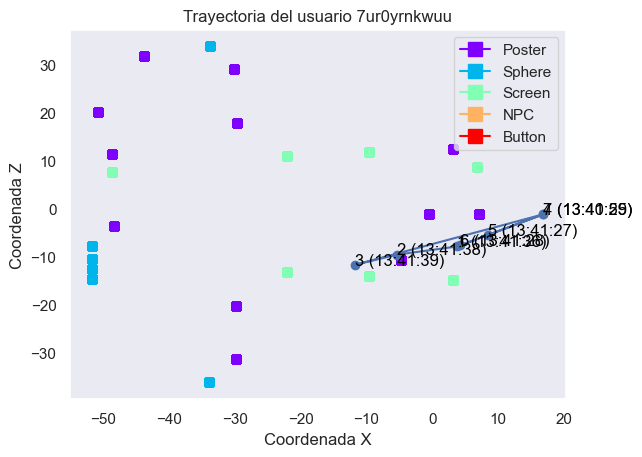

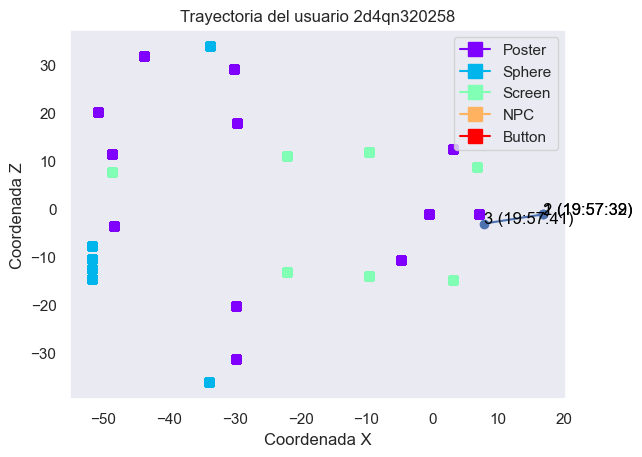

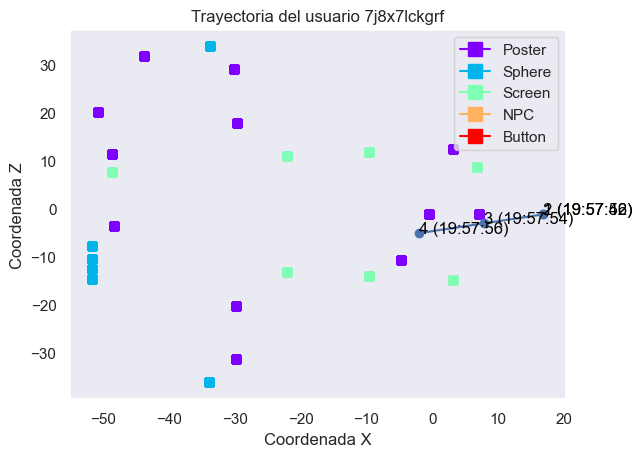

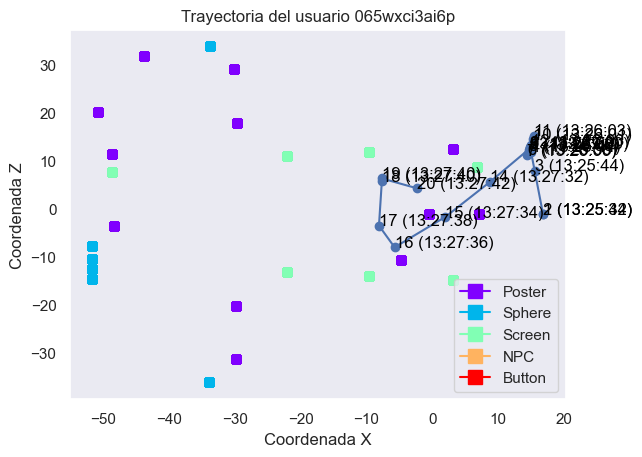

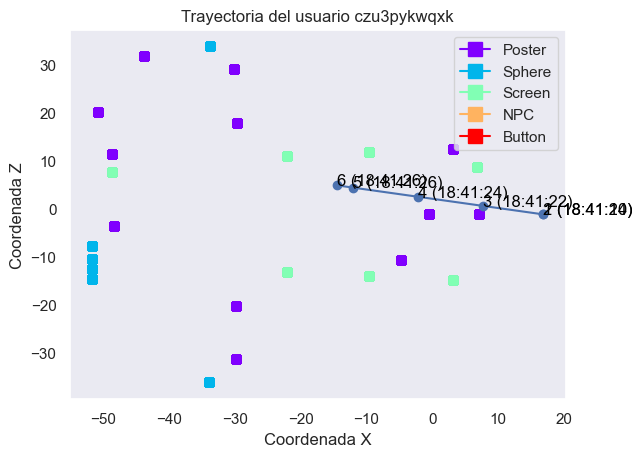

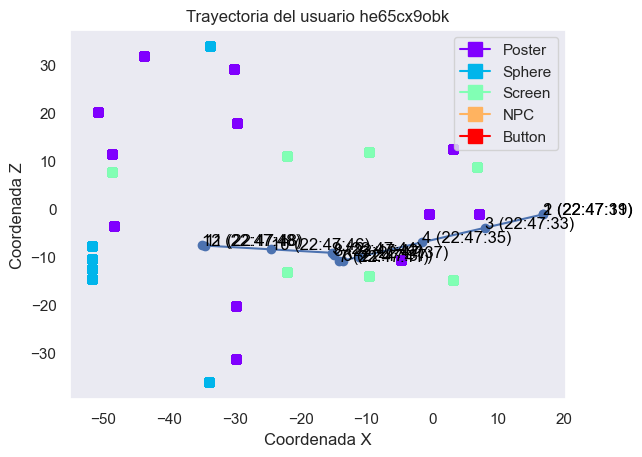

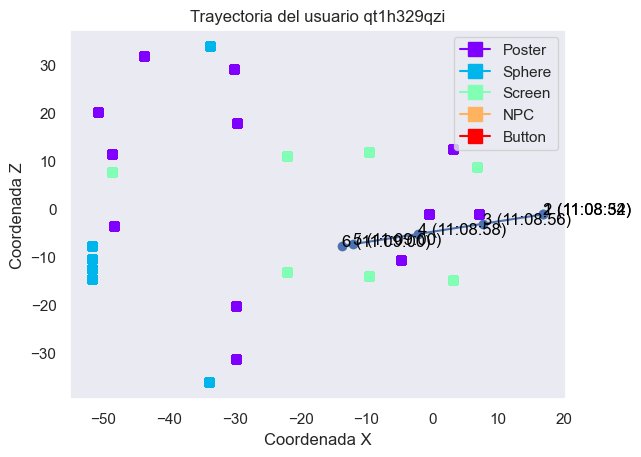

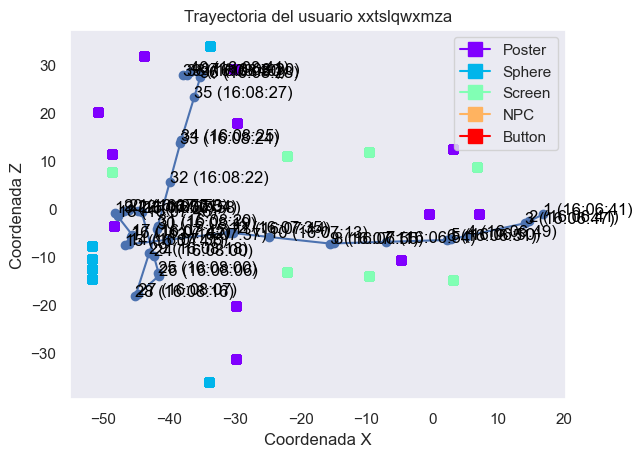

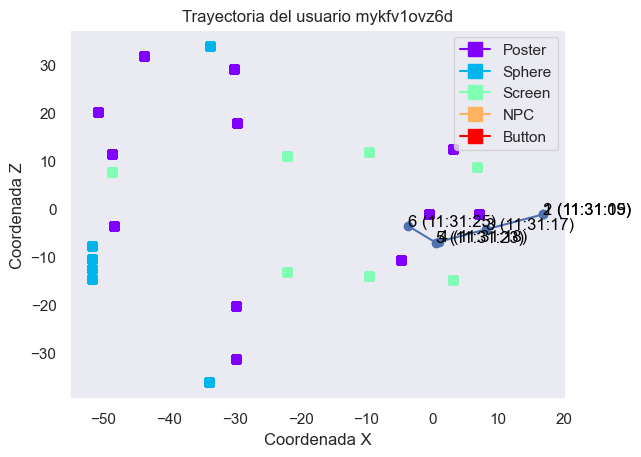

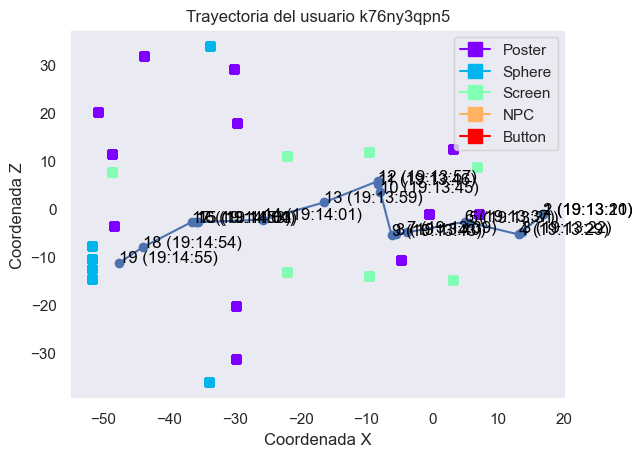

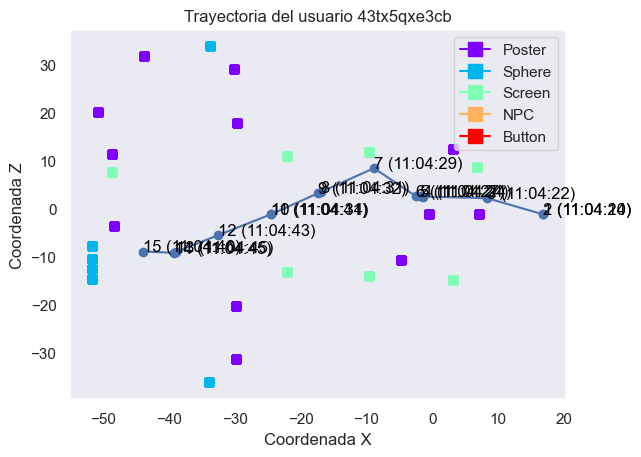

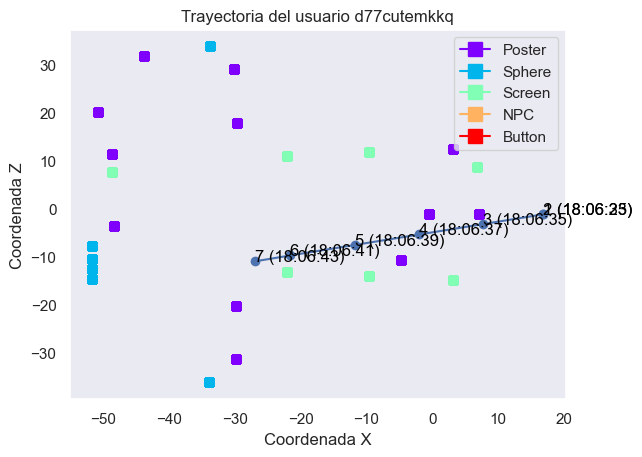

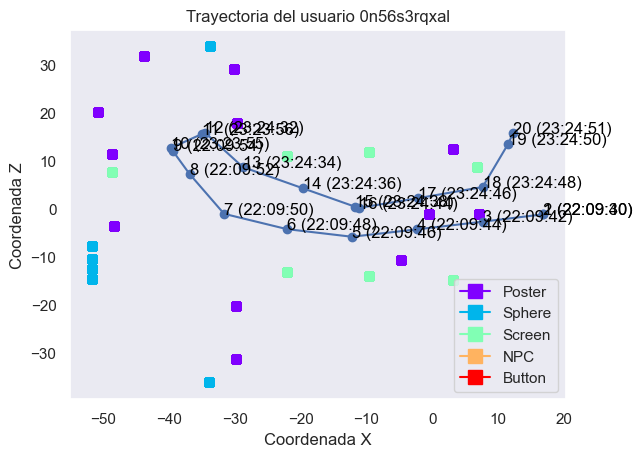

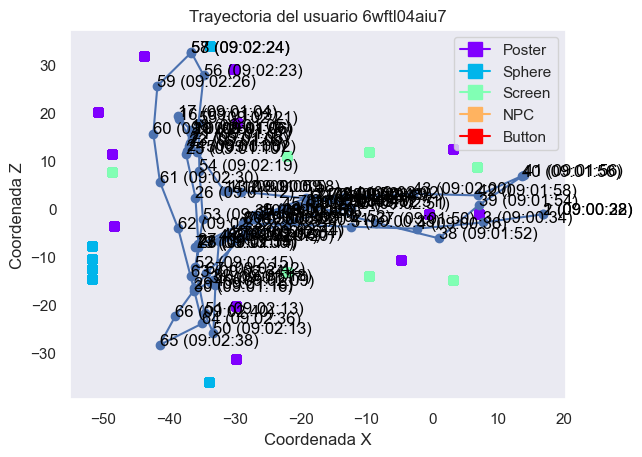

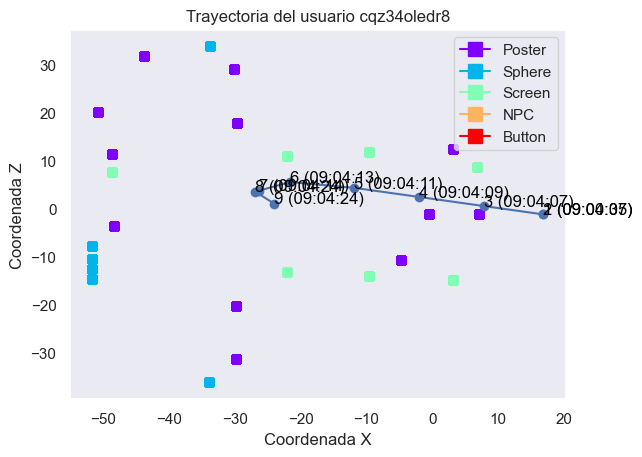

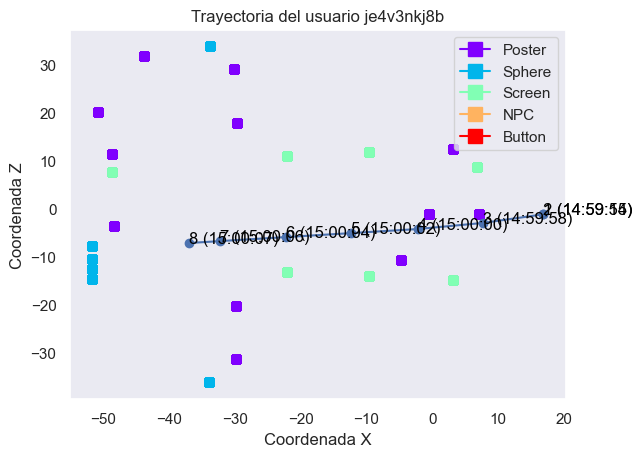

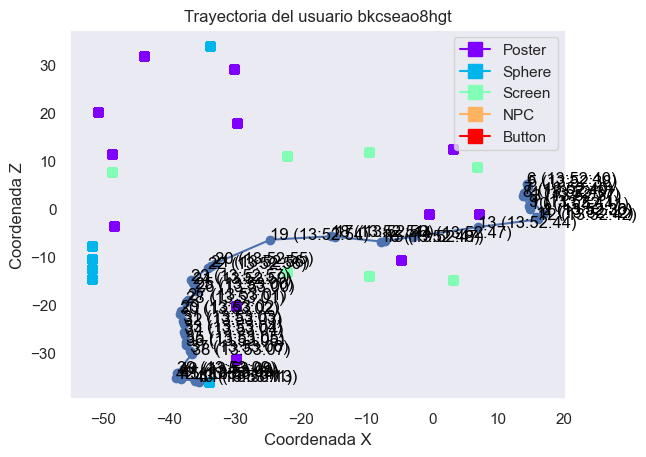

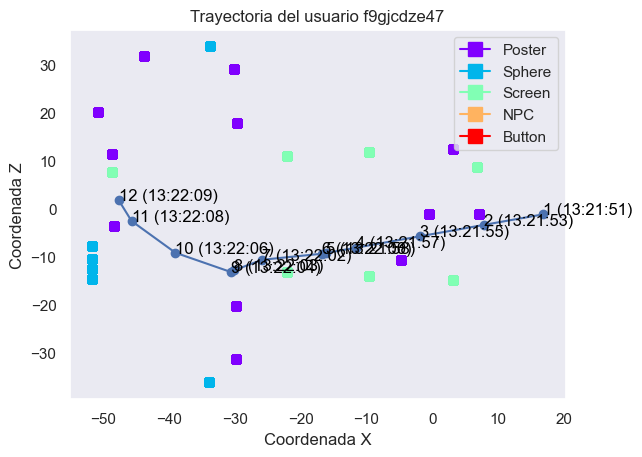

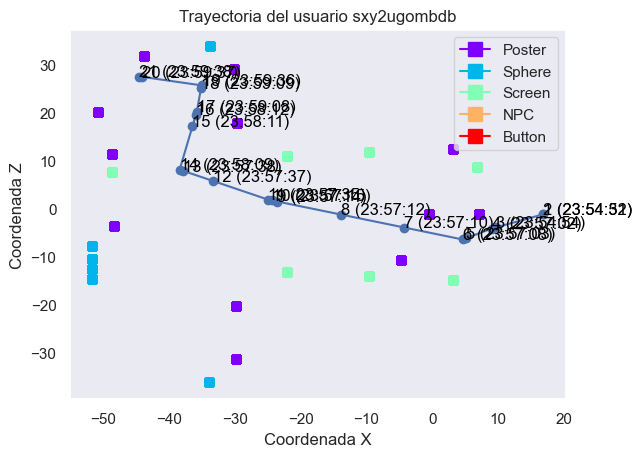

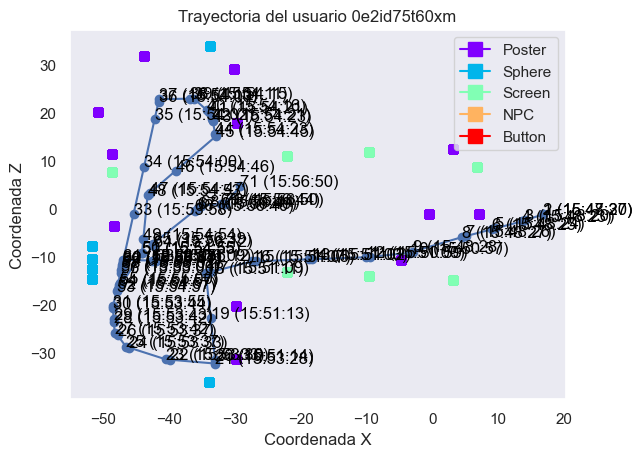

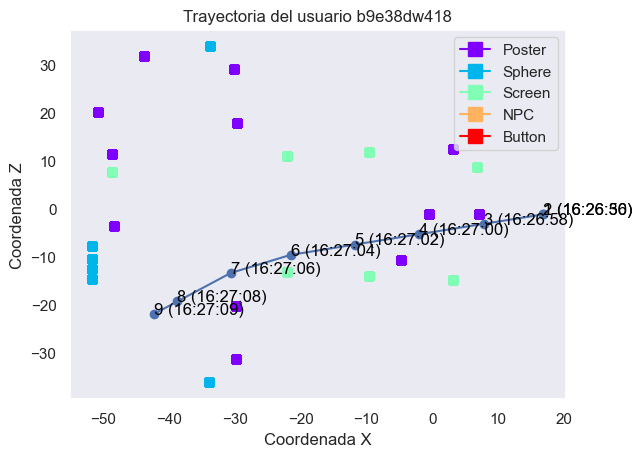

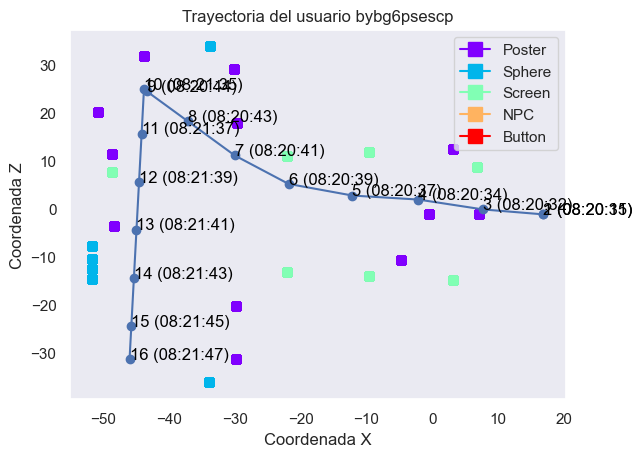

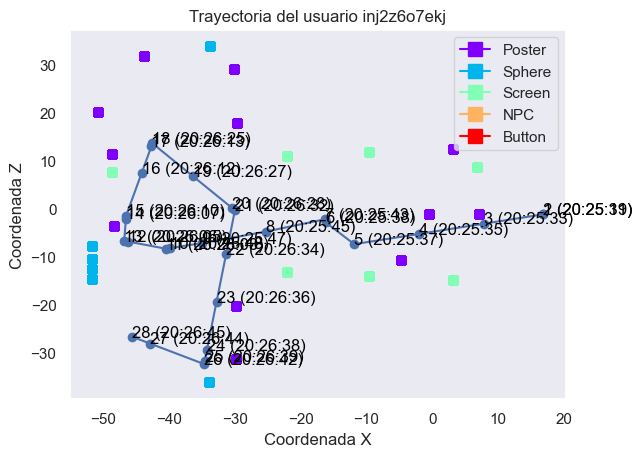

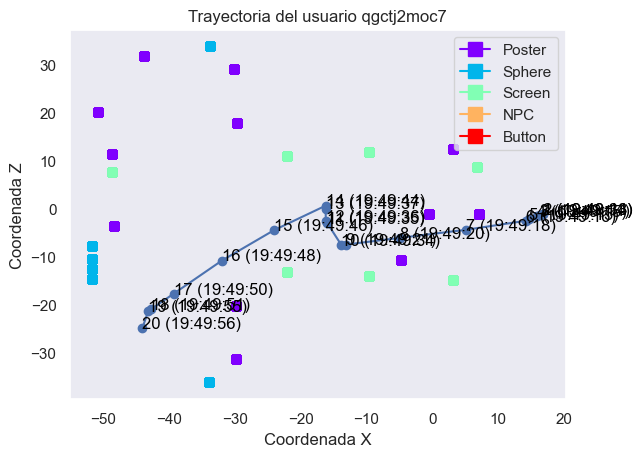

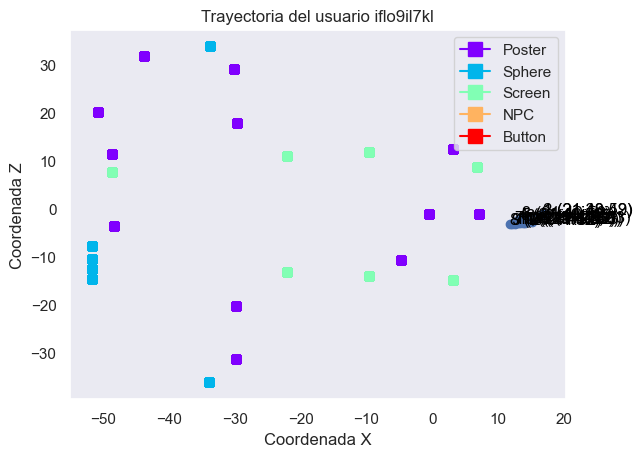

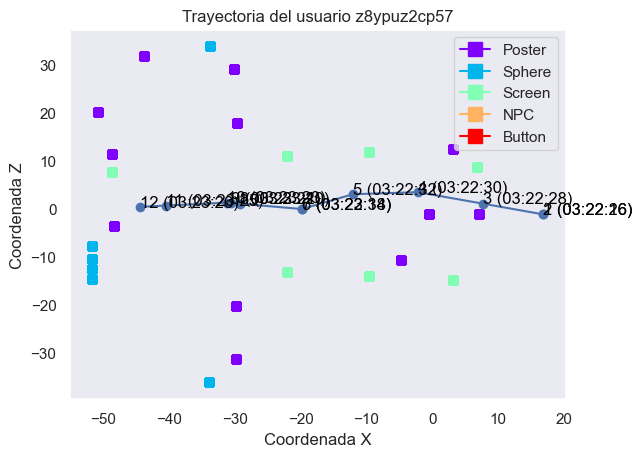

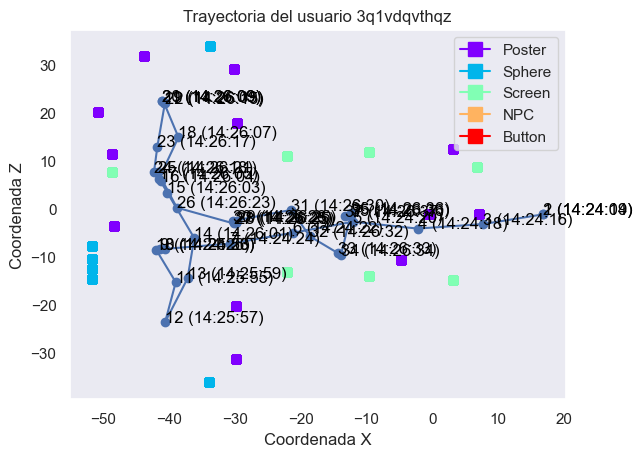

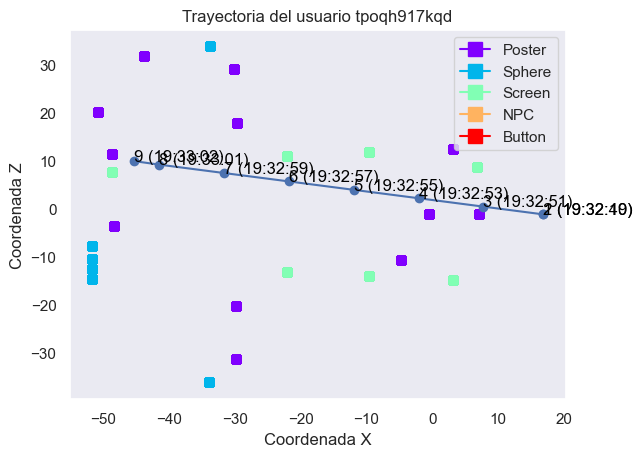

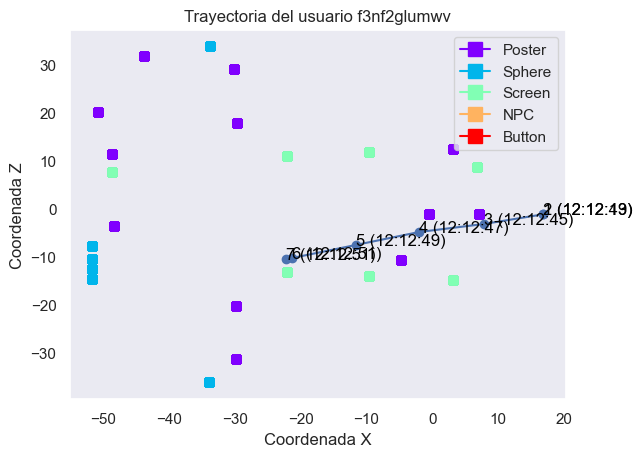

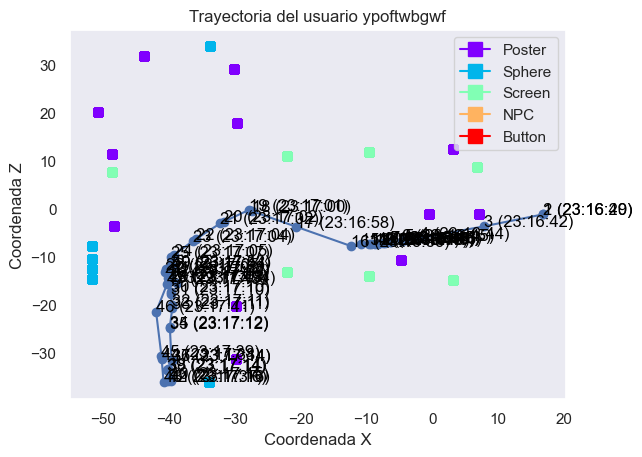

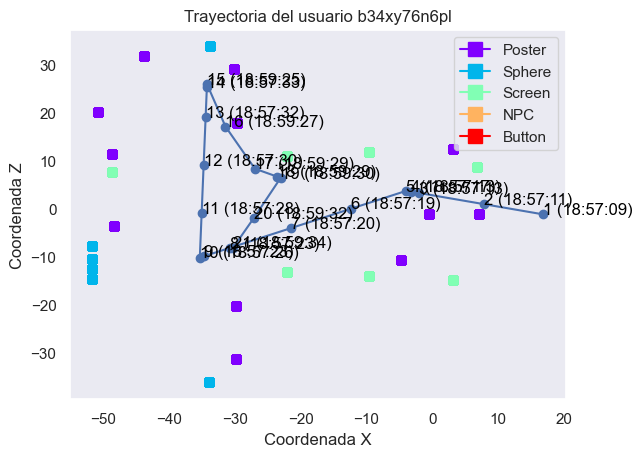

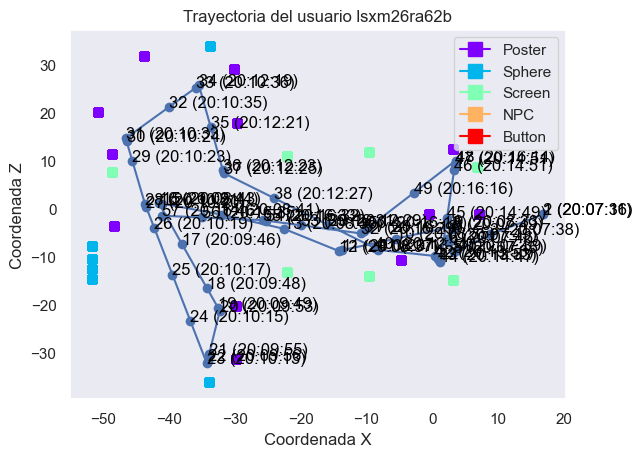

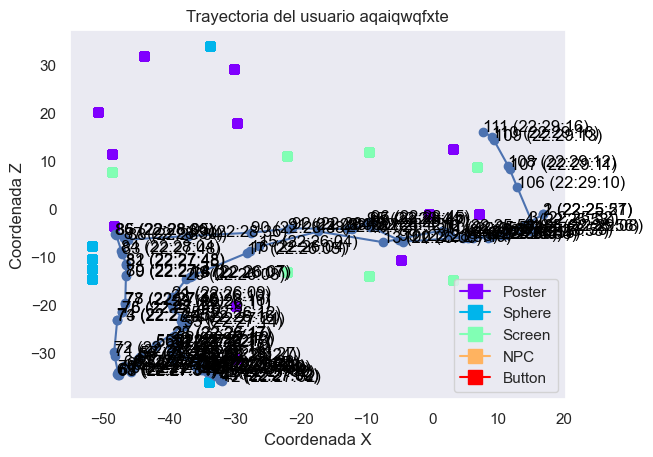

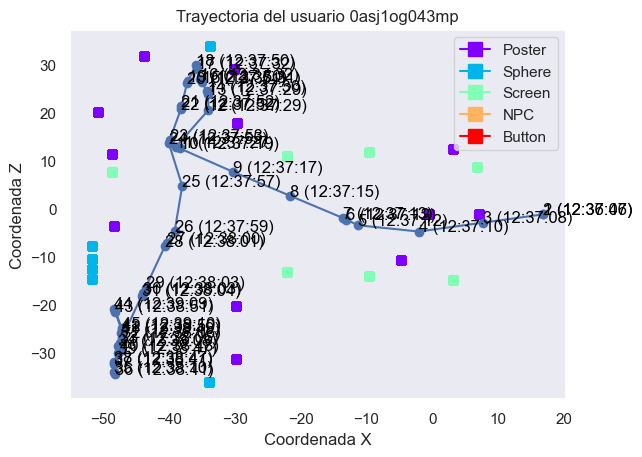

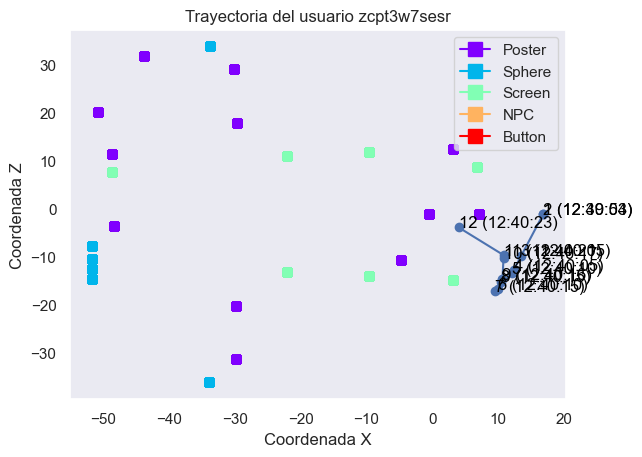

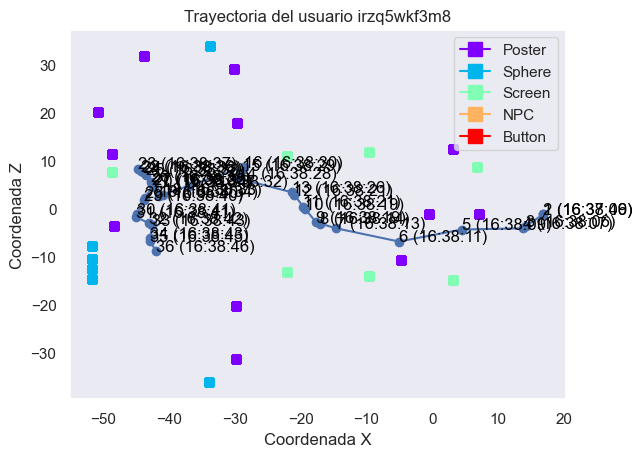

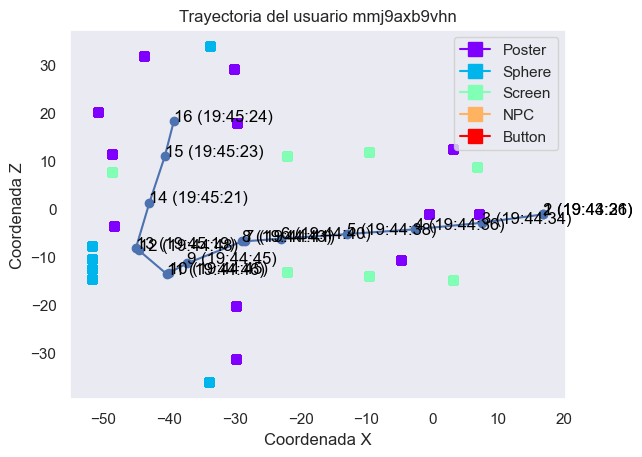

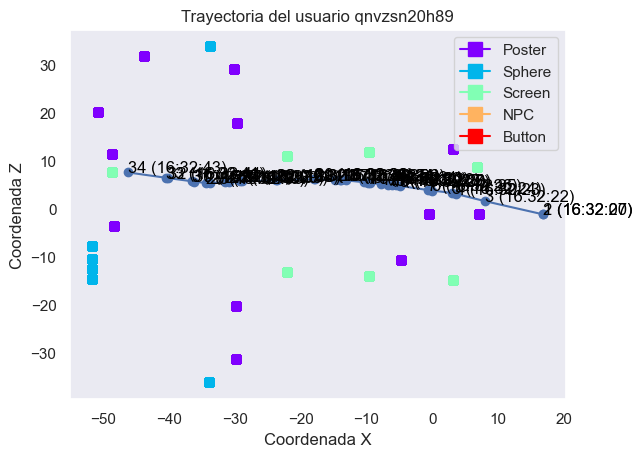

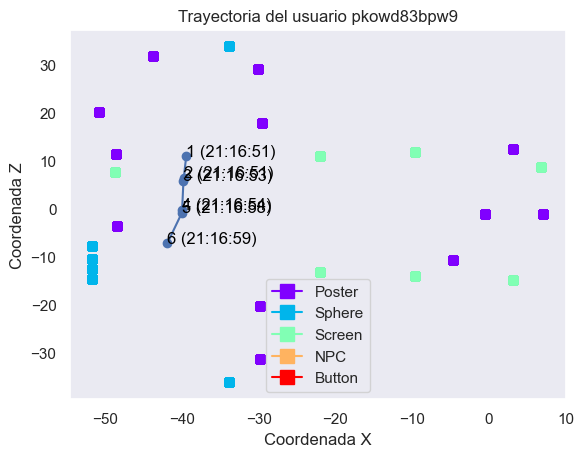

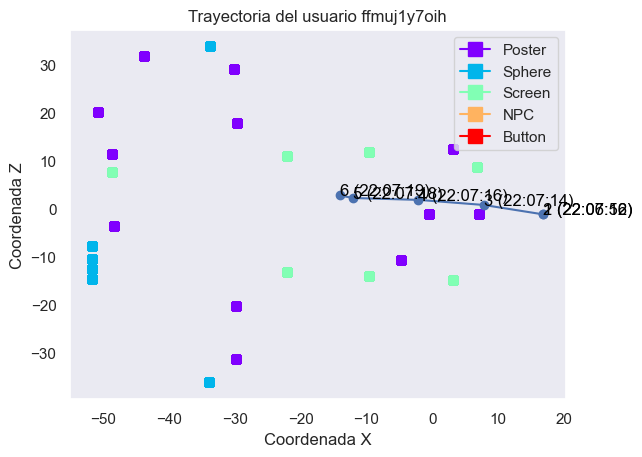

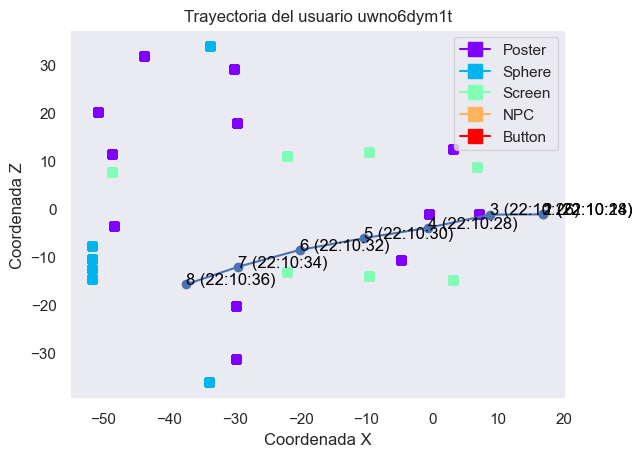

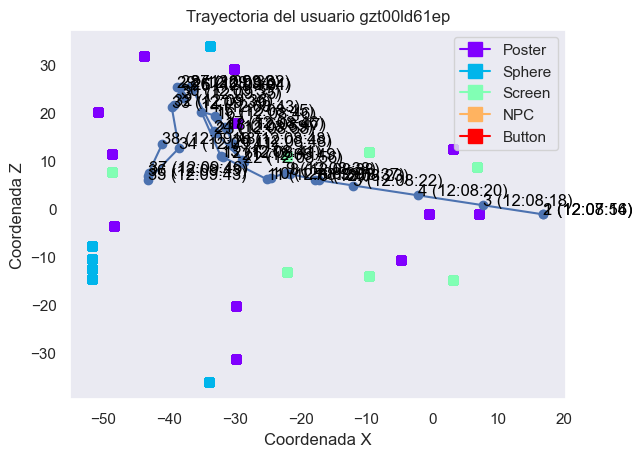

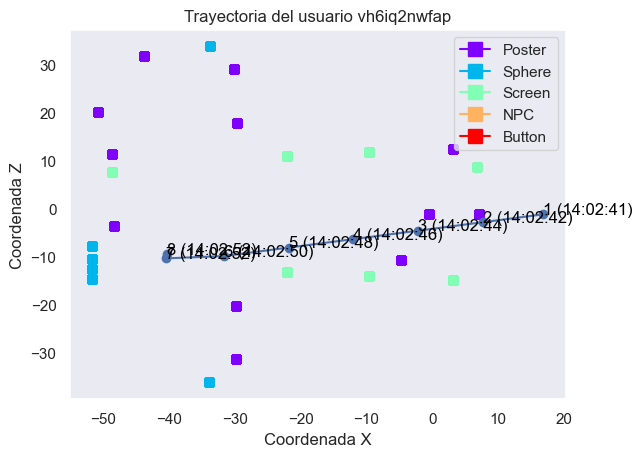

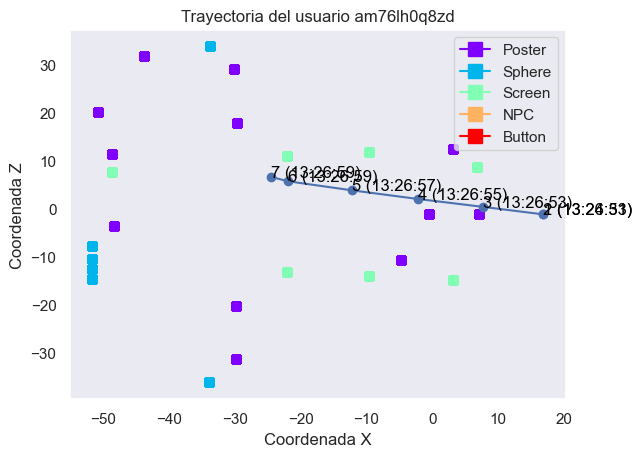

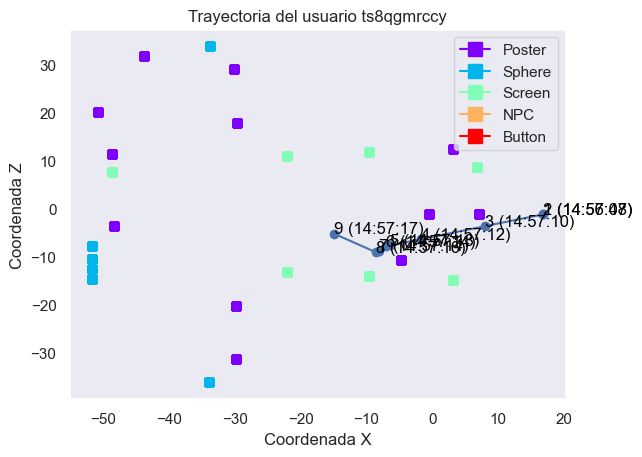

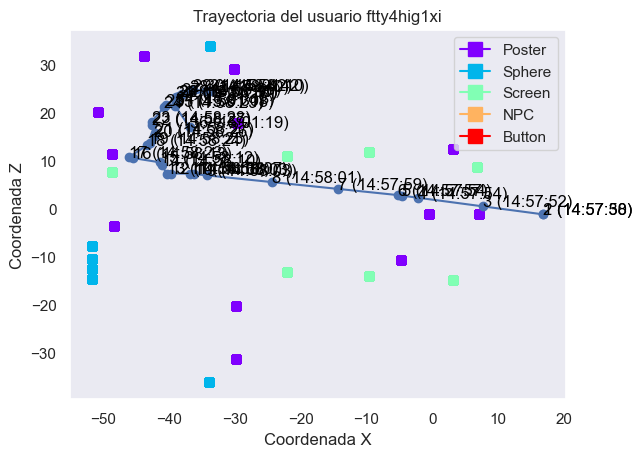

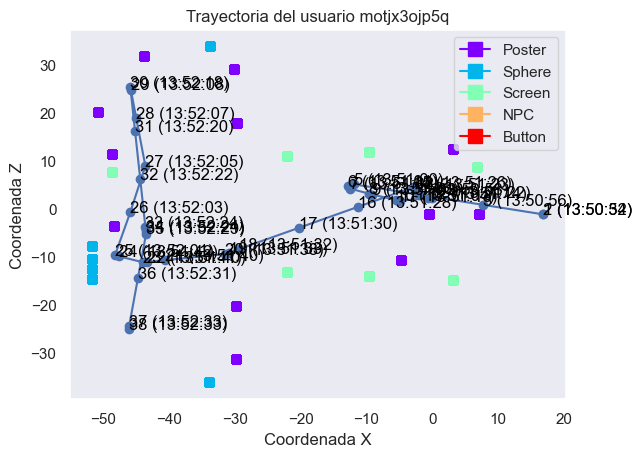

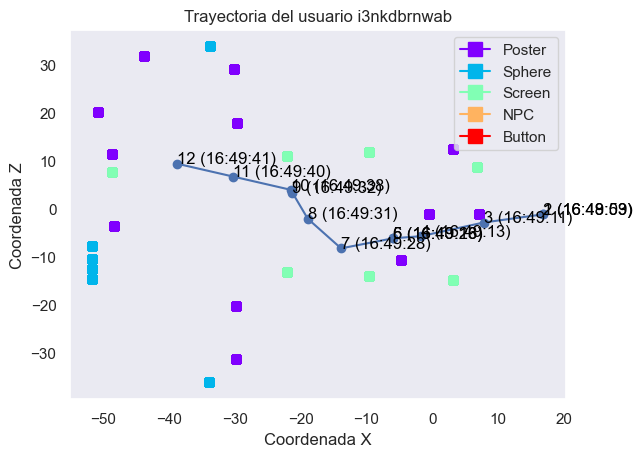

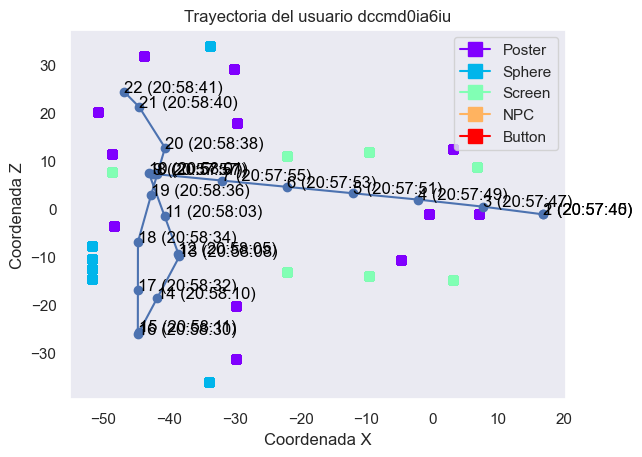

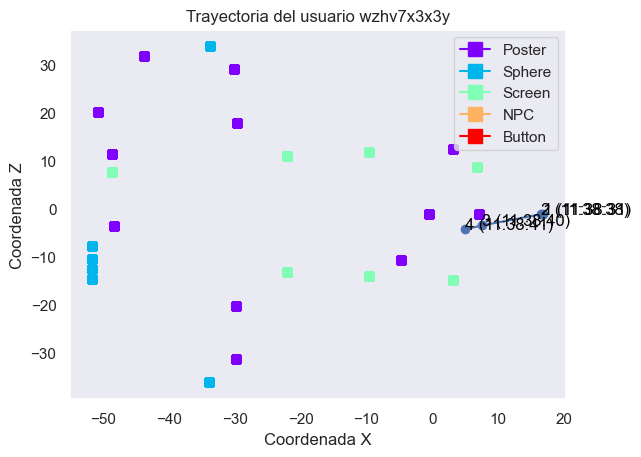

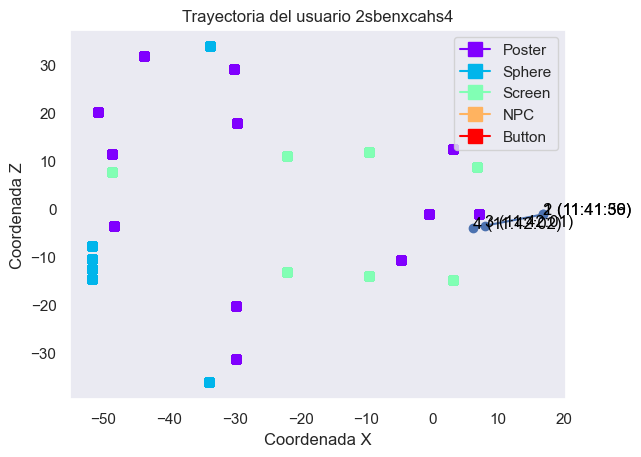

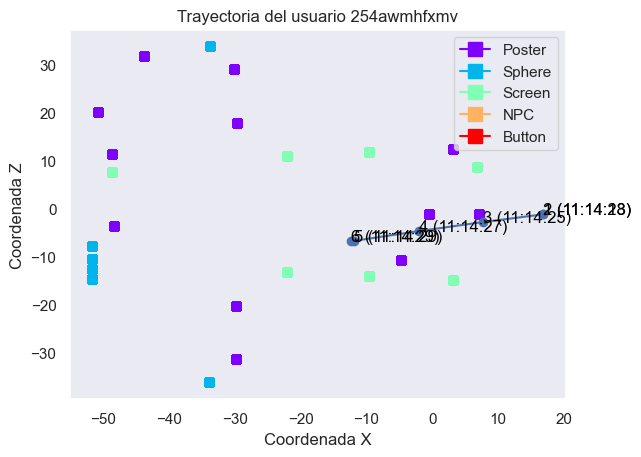

KeyboardInterrupt: 

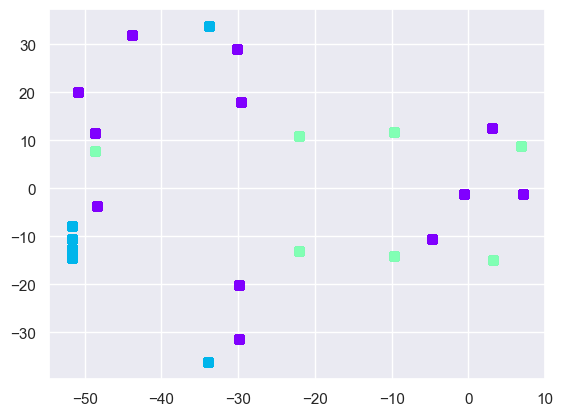

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def parse_position(x):
    if isinstance(x, str):
        return eval(x)
    elif isinstance(x, (tuple, list)):
        return x
    else:
        return None

def format_timestamp(timestamp):
    # Función para convertir el timestamp a formato horas:minutos:segundos
    return timestamp.strftime("%H:%M:%S")

# Filtrar filas donde object_type es igual a 'Player'
player_data = data[data['object_type'] == 'Player']

# Extraer las posiciones y convertirlas en una lista de tuplas
player_data['object_position'] = player_data['object_position'].apply(lambda x: eval(x) if x else None)

# Eliminar filas sin información de posición
player_data = player_data.dropna(subset=['object_position'])

############################################################
# Filtrar filas donde object_type no es igual a 'Player'
object_data = data[(data['object_type'] != 'Player') & (data['object_type'] != 'player')]

# Extraer las posiciones de los objetos y convertirlas en una lista de tuplas
object_data['object_position'] = object_data['object_position'].apply(parse_position)

# Obtener la lista de user_id únicos
unique_user_ids = player_data['user_id'].unique()

# Crear un diccionario de colores y asignar un color único a cada object_type
unique_object_types = object_data['object_type'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_object_types)))
color_map = {object_type: color for object_type, color in zip(unique_object_types, colors)}

# Crear un mapa para cada user_id único con más de una posición
for user_id in unique_user_ids:
    user_data = player_data[player_data['user_id'] == user_id]
    
    if len(user_data) > 1:# and user_id == 'iio0n2kxww':
        # Dibujar los object_id en el mapa
        object_positions = list(object_data['object_position'])
        object_ids = list(object_data['object_id'])
        object_types = list(object_data['object_type'])

        for object_id, pos, object_type in zip(object_ids, object_positions, object_types):
            if pos is not None and object_type in color_map:
                plt.scatter(pos[0], pos[2], marker='s', color=color_map[object_type])

        # Extraer las posiciones de los object_id y el tiempo
        positions = list(user_data['object_position'])
        timestamps = list(user_data['@timestamp'])
        object_ids = list(object_data['object_id'])
        object_types = list(object_data['object_type'])

        for object_id, pos, object_type in zip(object_ids, object_positions, object_types):
            if pos is not None:
                plt.scatter(pos[0], pos[2], marker='s', color=color_map[object_type])
        
        # Dibujar la trayectoria del usuario
        x_coords, y_coords = zip(*[(pos[0], pos[2]) for pos in positions])
        plt.plot(x_coords, y_coords, marker='o', linestyle='-', label='Trayectoria')

        # Dibujar el número de orden de aparición y el timestamp en las posiciones
        for i, (timestamp, pos) in enumerate(zip(timestamps, positions), start=1):
            plt.text(pos[0], pos[2], f"{i} ({format_timestamp(timestamp)})", fontsize=12, color='black')

        # Configurar el gráfico
        plt.title(f"Trayectoria del usuario {user_id}")
        plt.xlabel('Coordenada X')
        plt.ylabel('Coordenada Z')

        # Crear una leyenda por tipo de objeto
        for object_type, color in color_map.items():
            plt.scatter([], [], marker='s', color=color, label=object_type)
        
        legend_elements = [plt.Line2D([0], [0], marker='s', color=color, label=object_type, markersize=10) for object_type, color in color_map.items()]
        plt.legend(handles=legend_elements)

        plt.grid()
        plt.show()

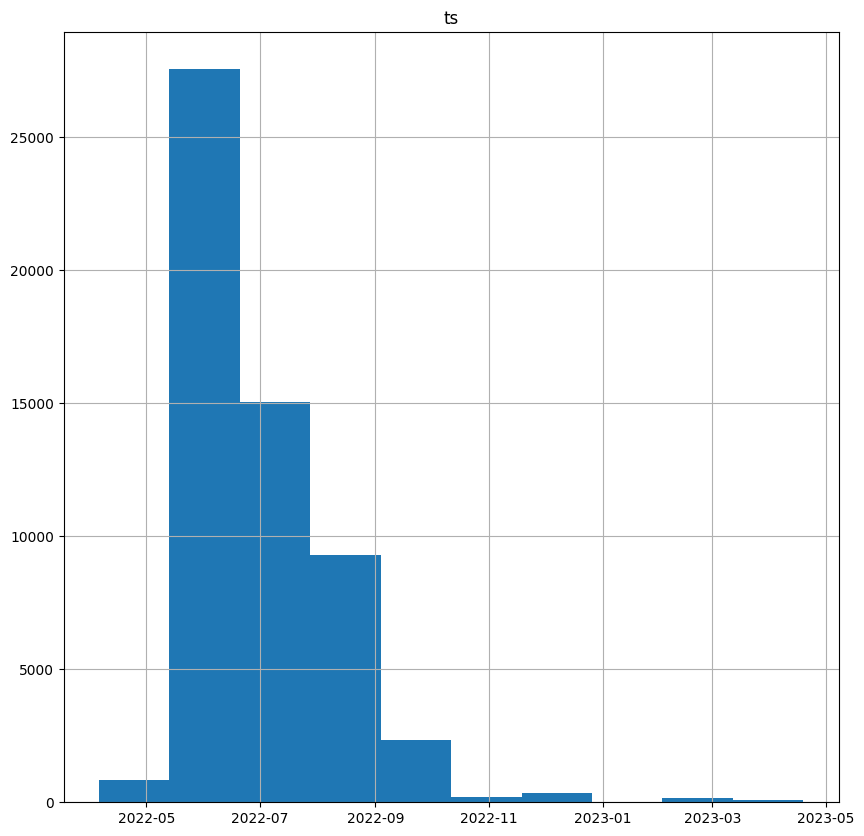

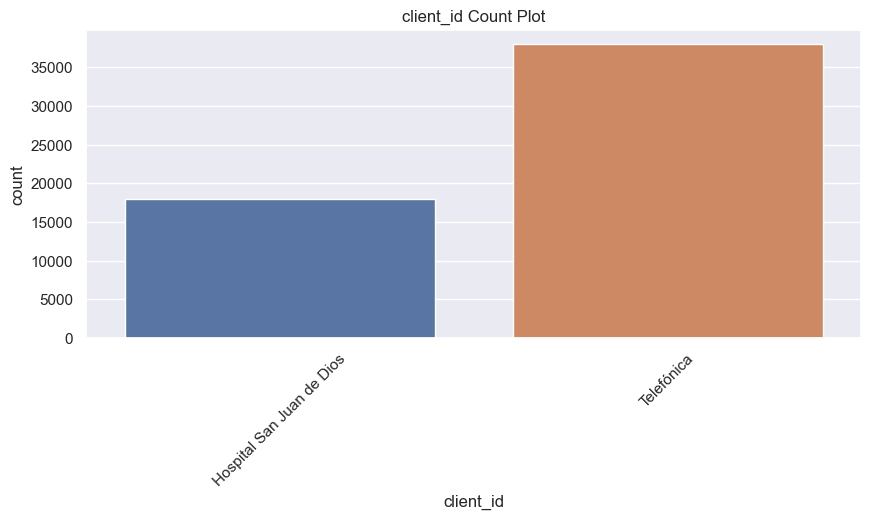

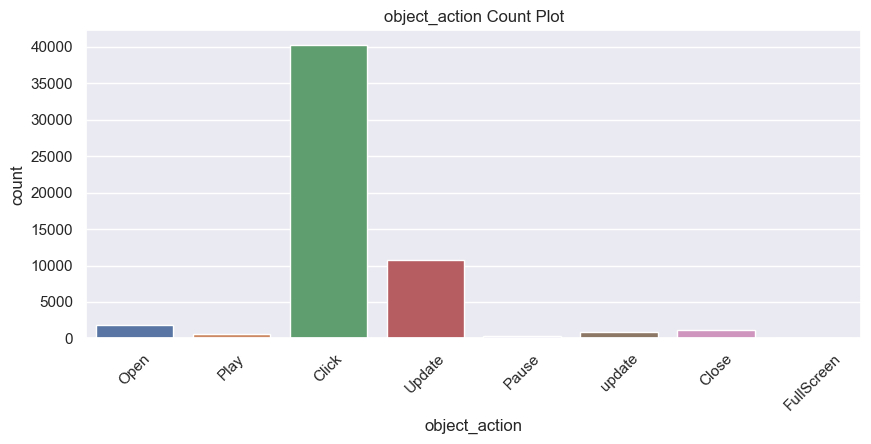

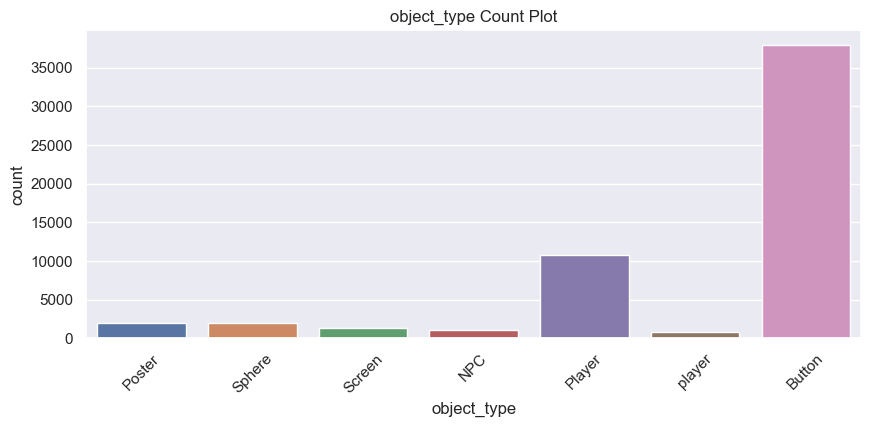

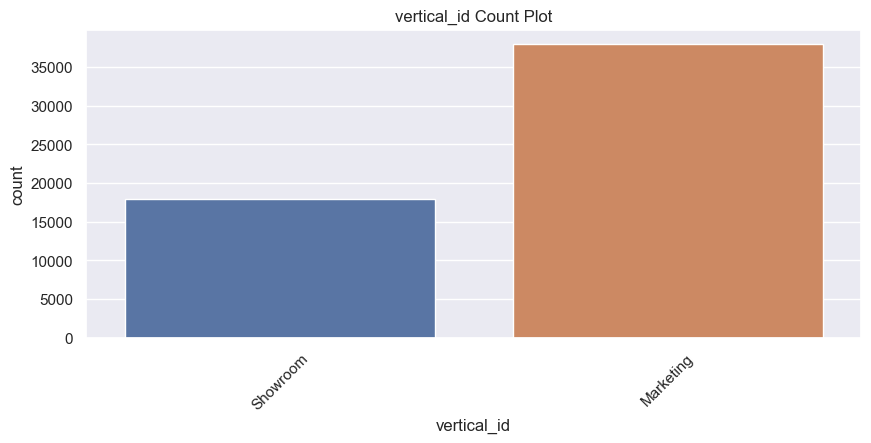

In [16]:
# Plot a histogram for each numerical variable
data.hist(figsize=(10, 10))
plt.show()

# Plot a count plot for each categorical variable
sns.set(style="darkgrid")
categorical_variables = ['client_id', 'object_action', 'object_type', 'vertical_id']
for var in categorical_variables:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=var)
    plt.title(f"{var} Count Plot")
    plt.xticks(rotation=45)
    plt.show()

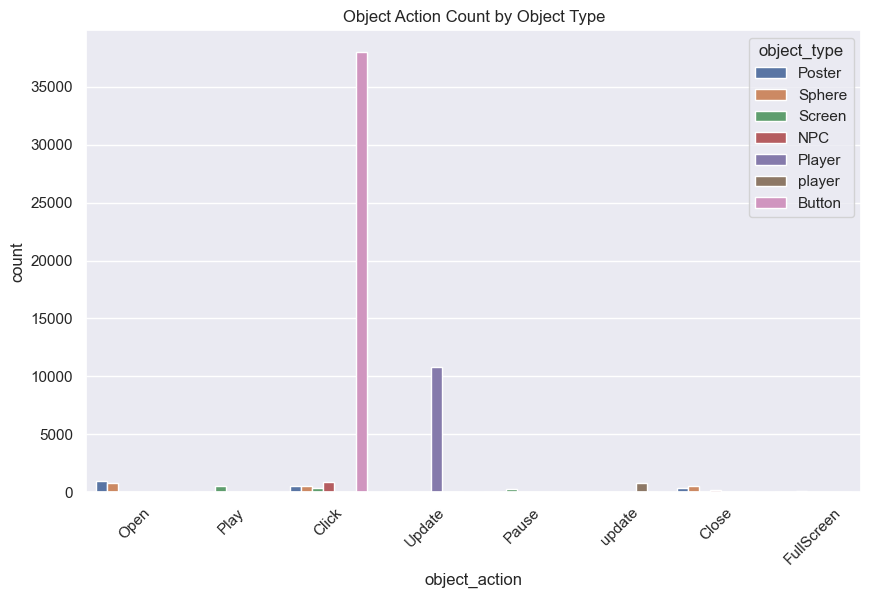

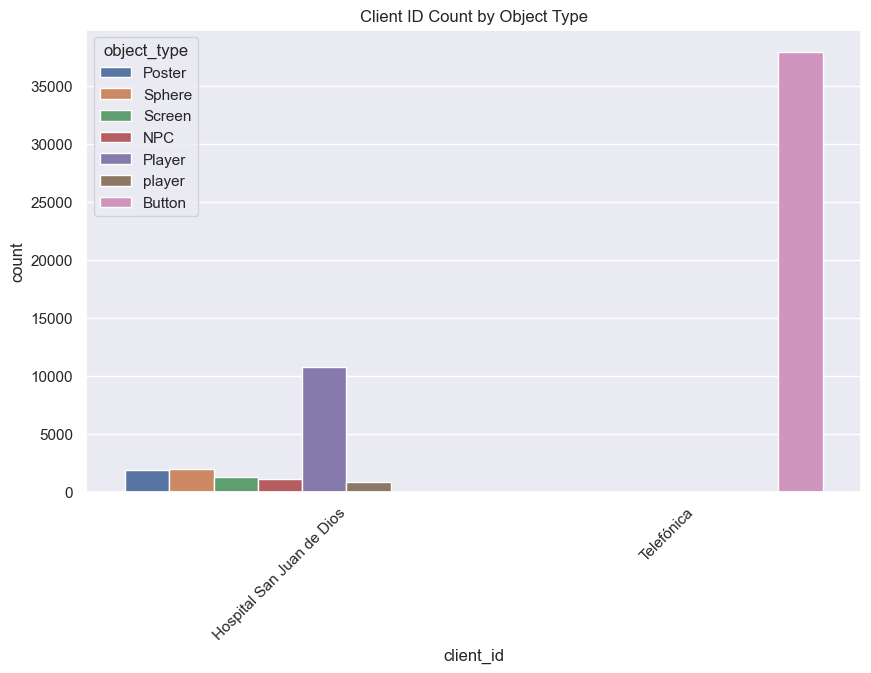

In [17]:
# Explore the relationship between object_action and object_type
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='object_action', hue='object_type')
plt.title("Object Action Count by Object Type")
plt.xticks(rotation=45)
plt.show()

# Explore the relationship between client_id and object_type
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='client_id', hue='object_type')
plt.title("Client ID Count by Object Type")
plt.xticks(rotation=45)
plt.show()